# Yüksek Korelasyon İçeren Özellik Model İçerisinde Dahil Değilken Yapılan Gözlem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv(
    'C:/Users/Mehmet Ersolak/Documents/GitHub/Data_Science_Project/Energy Consumption/Data_sets/train_energy_data.csv'
)

test_df = pd.read_csv(
    'C:/Users/Mehmet Ersolak/Documents/GitHub/Data_Science_Project/Energy Consumption/Data_sets/test_energy_data.csv'
)

In [2]:
def preprocess(df):

    # One-Hot Encoding
    df = pd.get_dummies(
        df,
        columns=['Building Type'],
        prefix='Type'
    )

    # Weekend Binary
    df['Is_Weekend'] = df['Day of Week'].map({
        'Weekday': 0,
        'Weekend': 1
    })

    df.drop('Day of Week', axis=1, inplace=True)

    return df


train_df = preprocess(train_df)
test_df  = preprocess(test_df)

In [3]:
train_df, test_df = train_df.align(
    test_df,
    join='left',
    axis=1,
    fill_value=0
)

In [4]:
X_train = train_df.drop('Energy Consumption', axis=1)
y_train = train_df['Energy Consumption']

X_test  = test_df.drop('Energy Consumption', axis=1)
y_test  = test_df['Energy Consumption']

In [5]:
drop_cols = ["Square Footage"]

X_train_drop = X_train.drop(columns=drop_cols)
X_test_drop  = X_test.drop(columns=drop_cols)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_drop)
X_test_scaled  = scaler.transform(X_test_drop)

In [14]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [15]:
models = {
    "Linear"      : LinearRegression(),
    "LassoCV"     : LassoCV(cv=5, random_state=42),
    "RidgeCV"     : RidgeCV(cv=5),
    "ElasticNetCV": ElasticNetCV(cv=5, random_state=42)
}

In [16]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):

    # Fit
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)

    print(f"\n{name} Sonuçları")
    print("-"*40)
    print("MAE :", mae)
    print("MSE :", mse)
    print("R2  :", r2)

    # Cross Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cv_r2 = cross_val_score(
        model,
        X_train,
        y_train,
        cv=kf,
        scoring="r2"
    )

    print("CV R2 Ortalama :", np.mean(cv_r2))
    print("CV R2 Std      :", np.std(cv_r2))

    # Plot → Gerçek vs Tahmin
    plt.figure(figsize=(6,6))

    plt.scatter(y_test, y_pred)

    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        '--'
    )

    plt.xlabel("Gerçek Değer")
    plt.ylabel("Tahmin")
    plt.title(f"{name} → Gerçek vs Tahmin")

    plt.show()


Linear Sonuçları
----------------------------------------
MAE : 595.189315226916
MSE : 478920.27163749776
R2  : 0.3020937309554447
CV R2 Ortalama : 0.39811327879077607
CV R2 Std      : 0.07621014188049091


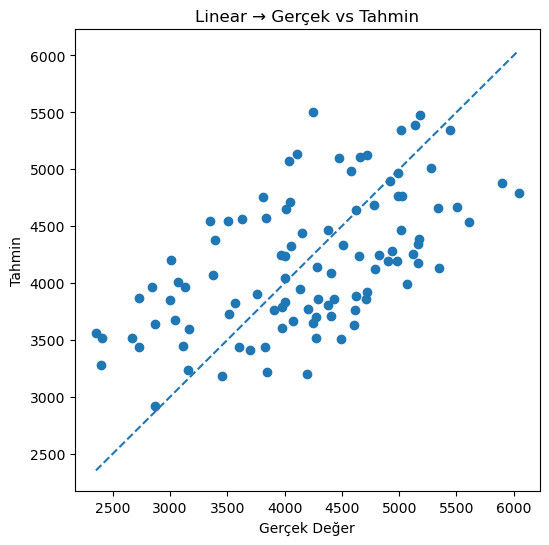


LassoCV Sonuçları
----------------------------------------
MAE : 595.1500081078365
MSE : 478876.1797915969
R2  : 0.3021579837705589
CV R2 Ortalama : 0.39838741302948877
CV R2 Std      : 0.07359409750262305


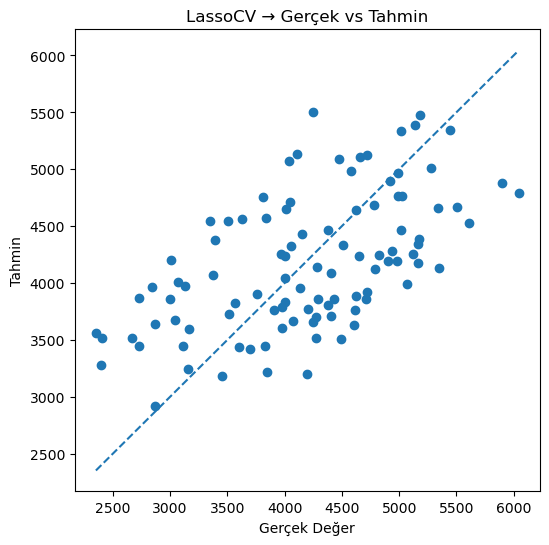


RidgeCV Sonuçları
----------------------------------------
MAE : 594.4167019030997
MSE : 477793.67169060535
R2  : 0.3037354680298707
CV R2 Ortalama : 0.3983033029514521
CV R2 Std      : 0.07500702906686929


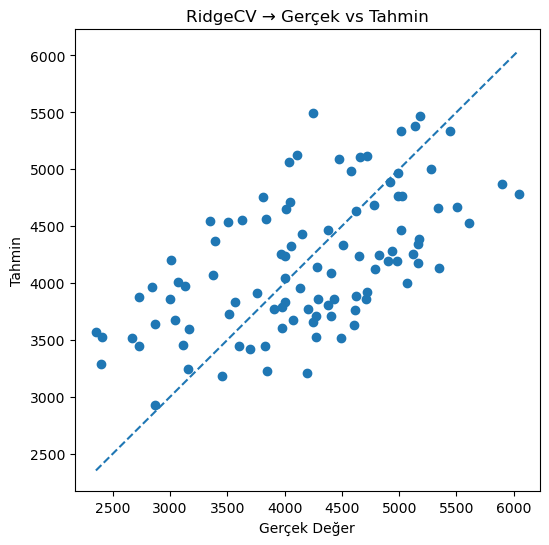


ElasticNetCV Sonuçları
----------------------------------------
MAE : 576.5934994427354
MSE : 464615.37267251854
R2  : 0.3229395361070475
CV R2 Ortalama : 0.38010519536260273
CV R2 Std      : 0.05033316534706762


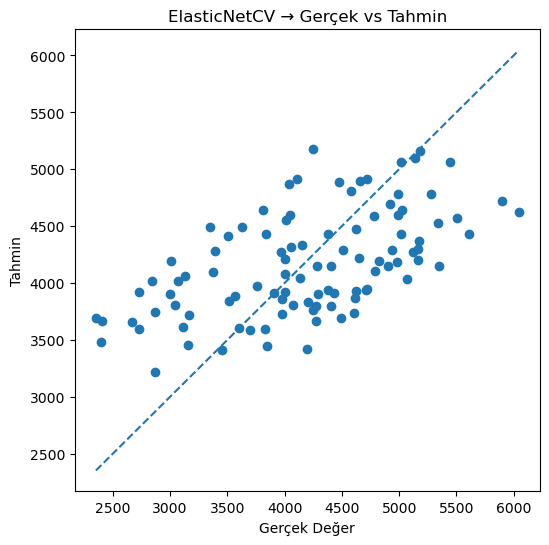

In [17]:
for name, model in models.items():
    evaluate_model(
        name,
        model,
        X_train_scaled,
        X_test_scaled,
        y_train,
        y_test
    )

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print("R2:", r2_score(y_test, y_pred))

R2: 0.18035845214206314
